**Regression:**

Regression is a supervised machine learning technique where the model predicts continuous values based on the labeled data

**Linear Regression:**

A type of regression where there exists linear relationship between one or more independent variables and one dependent variable.It essentially finds the "best-fit" line that represents the relationship between the variables

**Objective**: Implement and understand simple & multiple linear regression.

**Tools**: Scikit-learn, Pandas, Matplotlib

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection and Preprocessing**

In [193]:
dataset = pd.read_csv('/content/Housing.csv')
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**Handling missing values using mean/median/dropna()/fillna()**

In [194]:
dataset.dropna()
dataset.fillna(0)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**Converting categorical data into numerical data (Feature scaling)**

In [195]:
from sklearn.preprocessing import LabelEncoder

In [196]:
le = LabelEncoder()
catg_cols = dataset.select_dtypes(include = ['object','category']).columns
catg_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [197]:
dataset['mainroad'] = le.fit_transform(dataset['mainroad'])
dataset['guestroom'] = le.fit_transform(dataset['guestroom'])
dataset['basement'] = le.fit_transform(dataset['basement'])
dataset['hotwaterheating'] = le.fit_transform(dataset['hotwaterheating'])
dataset['airconditioning'] = le.fit_transform(dataset['airconditioning'])
dataset['prefarea'] = le.fit_transform(dataset['prefarea'])
dataset['furnishingstatus'] = le.fit_transform(dataset['furnishingstatus'])

**Generating summary statistics**

In [198]:
x = dataset[['price','area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']]

In [199]:
y = dataset[['furnishingstatus']]

In [200]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


**Split data into train-test sets**

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [202]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Training dataset**

In [203]:
x_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
46,7525000,6000,3,2,4,1,0,0,0,1,1,0
93,6300000,7200,3,2,1,1,0,1,0,1,3,0
335,3920000,3816,2,1,1,1,0,1,0,1,2,0
412,3430000,2610,3,1,2,1,0,1,0,0,0,1
471,3010000,3750,3,1,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6755000,6000,4,2,4,1,0,0,0,1,0,0
106,6160000,5450,4,2,1,1,0,1,0,1,0,1
270,4340000,4500,3,2,3,1,0,0,1,0,1,0
435,3290000,4040,2,1,1,1,0,0,0,0,0,0


In [204]:
y_train

,furnishingstatus
46,0
93,1
335,0
412,2
471,2
...,...
71,2
106,1
270,0
435,2


**Testing dataset**

In [205]:
x_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
316,4060000,5900,4,2,2,0,0,1,0,0,1,0
77,6650000,6500,3,2,3,1,0,0,0,1,0,1
360,3710000,4040,2,1,1,1,0,0,0,0,0,0
90,6440000,5000,3,1,2,1,0,0,0,1,0,0
493,2800000,3960,3,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15,9100000,6000,4,1,2,1,0,1,0,0,2,0
357,3773000,6930,4,1,2,0,0,0,0,0,1,0
39,7910000,6000,4,2,4,1,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0


In [206]:
y_test

,furnishingstatus
316,2
77,0
360,1
90,1
493,0
...,...
15,1
357,0
39,1
54,1


**Fit a Linear Regression model using sklearn.linear_model.**

In [207]:
model = LinearRegression()

In [208]:
model.fit(x_train,y_train)

LinearRegression()

**Predicted values on testing dataset**

In [209]:
model.predict(x_test)

array([[1.21687152],
       [0.95557682],
       [1.25063093],
       [0.90712097],
       [1.3565944 ],
       [1.17604798],
       [0.99463666],
       [1.0650627 ],
       [1.44700909],
       [1.44888266],
       [0.47822999],
       [1.36237589],
       [1.4351342 ],
       [1.25085216],
       [1.20951353],
       [1.58778921],
       [1.27761963],
       [0.74926098],
       [1.09297557],
       [1.37448958],
       [0.80898507],
       [0.96068318],
       [1.44082897],
       [0.82140608],
       [0.89746509],
       [0.17732158],
       [1.12751054],
       [0.92517472],
       [0.41365171],
       [1.30961097],
       [0.79861159],
       [1.1382687 ],
       [0.88765186],
       [1.33404276],
       [1.27032137],
       [1.12817841],
       [0.76106431],
       [1.07410513],
       [1.4248696 ],
       [1.40091267],
       [0.98030956],
       [1.22624061],
       [0.95422852],
       [1.00433864],
       [1.35685488],
       [1.1008853 ],
       [0.86643363],
       [0.930

**Evaluation using the metrics like** **MAE**(Mean Absolute Error), **MSE**(Mean Square Error), **R2.**.

In [210]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

**Mean Absolute Error on testing data**

In [211]:
mae = mean_absolute_error(y_test,model.predict(x_test))
mae

0.6528965180210892

**Mean Square Error on testing data**

In [212]:
mse = mean_squared_error(y_test,model.predict(x_test))
mse

0.6121348260126974

**R2 Error on testing data**

In [213]:
r2 = r2_score(y_test,model.predict(x_test))
r2

0.02848331981607577

**Plot regression line and interpret coefficients.**

In [214]:
model.coef_  #Coefficients

array([[-1.08125211e-07,  1.68538133e-05,  8.91783889e-03,
         6.19183519e-02, -5.21609903e-02, -1.73317308e-01,
        -2.33739906e-02, -1.51854159e-01, -3.88782284e-02,
        -2.12646366e-02, -7.63198651e-02,  3.61240630e-02]])

In [215]:
model.intercept_ #intercept

array([1.72941032])

**Regression Line for Training data**

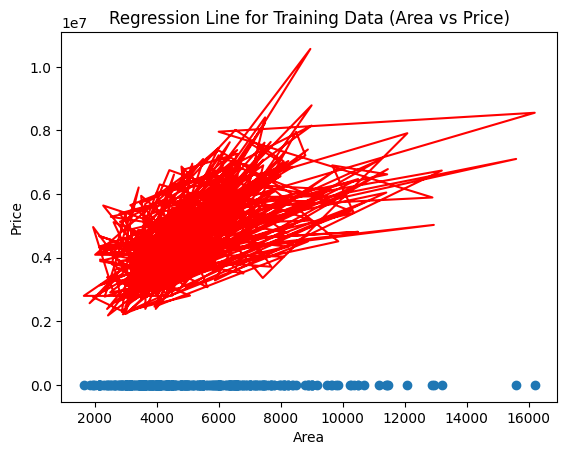

In [216]:
plt.scatter(x_train['area'], y_train)
plt.plot(x_train['area'], x_price_pred, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line for Training Data (Area vs Price)')
plt.show()

**Summary**

**Preprocessing steps included**:

Handling missing values (e.g., dropping or imputing them).

Converting categorical variables (if any) using encoding techniques.

Scaling/normalizing data if required.

Selecting relevant features and target variable.

**The dataset was split into training and testing sets** using train_test_split from sklearn.model_selection.

**Typical split ratio**: 80% training / 20% testing

A Linear Regression model was instantiated and trained using sklearn.linear_model.LinearRegression().

Model was **fit** using the training data (.fit(X_train, y_train)).

**Evaluate Model Performance**

Visualizations support interpretability and model diagnostics.